# MapReduce as a programming model



A Mapper function: 
Applies to every element in the collection

In [9]:
def fun(x):
    return x**2

A Reducer function: An arbitrary associative binary operation

In [12]:
def add(x,y):
    return x+y

def maximum(x,y):
    return max(x,y)

def minimum(x,y):
    return min(x,y)

def prod(x,y):
    return x*y

def selective_division(x,y):
    return x/y if x>y else y/x 

Conventional sequential program

In [10]:
L = [1,3,4,2,7]

s = 0
for a in L:
    s = s+a**2
print(s)

79


The same calculation using the __map__ primitive. 

In [26]:
    
S = map(fun, L)
print(S)
reduce(add, S)

[1, 9, 16, 4, 49]


79

No need to store the intermediate result: opens up the possibility for lazy evaluation

In [13]:
reduce(add, map(fun, L))

79

In [15]:
selective_division(89, 65)

1

In [28]:
#print(L)
print(S)

#print reduce(selective_division, S)

#print reduce(add, map(fun, L))

#print reduce(minimum, S)
print reduce(maximum, S)

[1, 9, 16, 4, 49]
49


Number of even entries 

In [6]:
def is_even(x):
    return 1 if x%2==0 else 0

In [7]:
reduce(add, map(is_even, L))


2

Calculating the average:

In [17]:
def one(x):
    return 1

In [20]:
reduce(add, L)/float(reduce(add, map(one, L)))

3.4

Compute the average

In [30]:
A = ['Ahmet', 'Mehmet', 'Veli', 'Aras'] 

def is_A(x):
    return 1 if x[0]=='A' else 0

reduce(lambda x,y: x+y, map(is_A, A))

#reduce(add, A)

2

In [31]:
def print_and_add(x,y):
    print(x,y)
    return x+y

In [32]:
L = range(16)

reduce(print_and_add, L)

(0, 1)
(1, 2)
(3, 3)
(6, 4)
(10, 5)
(15, 6)
(21, 7)
(28, 8)
(36, 9)
(45, 10)
(55, 11)
(66, 12)
(78, 13)
(91, 14)
(105, 15)


120

# Spark

RDD : Resilient Distributed Dataset

Note: This notebook version needs the Python 2.7. When the notebook server is launched from
a 3.x environment, the environment variables are not set correctly.

## Load a text file on the HDFS as a RDD
* Display number of lines

In [38]:
#import findspark
#findspark.init()
#import pyspark
#sc = pyspark.SparkContext(appName="Deneme")

import sys
import numpy as np

#textFile = sc.textFile("data/books-eng/hamlet.txt")
textFile = sc.textFile("data/books-eng")
textFile.count()

133228

## Get the first line

In [39]:
textFile.first()

u'ACT I'

## Find number of lines where a word appears

In [40]:
word = "CLAUDIUS"
textFile.filter(lambda lin: word in lin).count()

127

## Get a random sample from the file

In [54]:
textFile.sample(withReplacement=False, fraction=0.05).first()

u'The office and devotion of their view'

In [55]:
def prnt(x):
    print x

textFile.sample(withReplacement=False, fraction=0.05).take(10)

[u'Flourish. Enter ANTONY, CLEOPATRA, her Ladies, the Train, with Eunuchs fanning her',
 u'Look, where they come:',
 u'CLEOPATRA ',
 u'Then must thou needs find out new heaven, new earth.',
 u'Grates me: the sum.',
 u'MARK ANTONY ',
 u"There's not a minute of our lives should stretch",
 u'CLEOPATRA ',
 u'The qualities of people. Come, my queen;',
 u'Exeunt MARK ANTONY and CLEOPATRA with their train']

In [59]:
textFile.take(10)

[u'ACT I',
 u"SCENE I. Alexandria. A room in CLEOPATRA's palace.",
 u'',
 u'Enter DEMETRIUS and PHILO ',
 u'PHILO ',
 u"Nay, but this dotage of our general's",
 u"O'erflows the measure: those his goodly eyes,",
 u"That o'er the files and musters of the war",
 u"Have glow'd like plated Mars, now bend, now turn,",
 u'The office and devotion of their view']

## Find the line with most words

In [60]:
textFile.map(lambda line: len(line.split())).reduce(lambda a, b: a if (a > b) else b)

122

In [66]:
textFile.map(lambda line: (len(line.split()),line) ).reduce(lambda a, b: a if (a[0] > b[0]) else b)

(122,
 u"    [Enter a King and a Queen very lovingly; the Queen embracing him, and he her. She kneels, and makes show of protestation unto him. He takes her up, and declines his head upon her neck: lays him down upon a bank of flowers: she, seeing him asleep, leaves him. Anon comes in a fellow, takes off his crown, kisses it, and pours poison in the King's ears, and exit. The Queen returns; finds the King dead, and makes passionate action. The Poisoner, with some two or three Mutes, comes in again, seeming to lament with her. The dead body is carried away. The Poisoner wooes the Queen with gifts: she seems loath and unwilling awhile, but in the end accepts his love]")

In [61]:
'abc df'.split()

['abc', 'df']

In [65]:
s = 'xyz'
pair = (len(s), s)

pair[0]

3

## Counting words

In [67]:
wordCounts = textFile.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)
wordCounts.collect()

[(u'Exasperated,', 2),
 (u'aided', 2),
 (u'drunkenness.', 2),
 (u'glad,"', 5),
 (u'Chichagov,', 8),
 (u"unvarnish'd", 1),
 (u'Danois', 1),
 (u'admiration?', 1),
 (u'forges', 3),
 (u'blisters', 2),
 (u'habilet\xe9;', 1),
 (u'brightening', 4),
 (u'ever?', 1),
 (u'travaux', 2),
 (u'Romeo,--', 1),
 (u'Kirilovich', 1),
 (u'pedestrian,', 1),
 (u'bourreau.', 1),
 (u'party.', 10),
 (u'rocking', 6),
 (u'piti\xe9!--Elle', 1),
 (u'booths.', 1),
 (u'looking', 415),
 (u'flash.', 3),
 (u'Senior', 1),
 (u'pointing', 78),
 (u'inheritance.', 2),
 (u'Sewer,', 1),
 (u'(His', 1),
 (u'larger,', 1),
 (u'contained', 7),
 (u"reckon'd.", 1),
 (u'Oka', 1),
 (u'mark-man!', 1),
 (u'donner?', 1),
 (u'Eh,', 7),
 (u'war!"', 1),
 (u'Craftsmen', 1),
 (u'"Encouraging', 1),
 (u'attack,"', 2),
 (u'enclosures,', 1),
 (u'1813.', 2),
 (u'nourisher', 1),
 (u'artilleryman', 4),
 (u'motifs', 1),
 (u'cozenage', 1),
 (u'be!"', 12),
 (u'today?', 3),
 (u'trumpeters,', 1),
 (u'blanket', 3),
 (u'breadth.', 2),
 (u'goats,', 2),
 (u'p

## Using the Cache
Pull a data sets into a cluster-wide in-memory cache. 

Very useful when using iterative algorithms.



In [15]:
textFile.cache()

data/books-eng/hamlet.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

## Find words that start with an 'H' or 'h'

In [68]:
words = textFile.flatMap(lambda line: line.split())
words_subset = words.filter(lambda x: x[0] in ['H','h'])
counts = words_subset.map(lambda w: (w,1)).reduceByKey(lambda a,b: a+b)
counts.collect()

[(u"host's", 2),
 (u'humid', 1),
 (u'huge,', 8),
 (u'hillock.', 1),
 (u'hurrah!', 4),
 (u'hurry?"', 1),
 (u'Had', 59),
 (u'habilet\xe9;', 1),
 (u'hibernation', 1),
 (u'heirs', 1),
 (u'harness,', 5),
 (u'historians--those', 1),
 (u'health..."', 1),
 (u'hear,"', 1),
 (u'honesty,', 3),
 (u'historians--the', 1),
 (u'himself.)', 1),
 (u'hands,', 71),
 (u'heels;', 1),
 (u'hopeful', 3),
 (u'her,"', 12),
 (u'haste;', 4),
 (u'haquen\xe9es', 1),
 (u'hampered', 2),
 (u"ha't", 1),
 (u'highroad--polished', 1),
 (u'host;', 1),
 (u'HUSTON,', 2),
 (u'hope', 101),
 (u'happened,', 17),
 (u'Ha,', 14),
 (u'HANSON,', 1),
 (u'Helena.', 1),
 (u'history.', 15),
 (u'HUM.', 1),
 (u'herbs,', 3),
 (u'home?"', 3),
 (u'hut--and', 1),
 (u'hedge', 2),
 (u'him--in', 3),
 (u'http://pglaf.org/fundraising.', 2),
 (u'howling.', 2),
 (u'hastes', 1),
 (u'hugged', 5),
 (u'houses,', 21),
 (u'horizons', 1),
 (u'hosts', 1),
 (u'hate;', 2),
 (u"hack'd", 1),
 (u'harness...."', 1),
 (u'hems.', 1),
 (u'husband', 97),
 (u'hour!', 2)

### Cleanup using a regular expression

* remove all non-alphanumeric characters

In [17]:
import re

# Compile a regular expression that matches non-alphanumerics
pattern = re.compile('[\W_]+', re.UNICODE)

# Replace all non-alphanumerics with a space, then split into words
words = textFile.map(lambda line: pattern.sub(' ',line)).flatMap(lambda line: line.split())

#first_letters = set(['H','h','Q','q','s','S'])
first_letters = set(['A','a'])
# Count words that start with H
words_subset = words.filter(lambda x: x[0] in first_letters)
counts = words_subset.map(lambda w: (w,1)).reduceByKey(lambda a,b: a+b)
res = counts.collect()
for r,c in res:
    print r,c

all 110
antic 1
armour 3
actions 2
admittance 1
aspect 1
amiss 2
appetite 1
accurst 1
Awake 1
advanced 1
admirable 1
Away 2
abused 1
assay 4
advantage 1
account 1
answer 14
Anon 3
accuse 1
animals 1
affections 1
Affection 1
Art 1
arrows 2
abatements 1
audience 5
argal 3
arrow 1
Attends 1
Aroused 1
antique 2
achievements 1
art 16
afflict 1
asleep 2
aloof 2
appurtenance 1
Attendants 9
attend 1
armed 2
away 23
access 1
acting 1
above 4
assurance 2
ass 4
accord 1
assured 2
ask 2
Against 4
abate 1
Addicted 1
along 3
about 15
abstinence 1
accepts 1
assault 1
against 19
aye 1
anon 3
Advancing 1
action 10
approve 2
altitude 1
amber 1
acted 1
apt 2
arras 5
alone 10
alleys 1
another 11
Answer 1
array 1
afoot 1
abominably 1
acquaint 1
addition 3
angry 1
accent 2
audit 1
avouch 1
adoption 1
angels 2
a 469
A 81
Assume 1
awake 1
ashamed 1
And 264
admiration 3
aught 10
apprehension 2
arrant 2
appliance 1
aim 2
Almost 1
assays 1
amble 1
age 9
affection 3
and 706
angel 4
almost 9
abstract 1
am 51
affri

## Counting Letter bigrams



In [18]:
import re

#textFile = sc.textFile("notes/data/books-eng/hamlet.txt")
textFile = sc.textFile("data/books-eng")

# Compile a regular expression that matches non-alphanumerics
pattern = re.compile(u'[\W0-9_]+', re.UNICODE)

# Replace all non-alphanumerics with a space, then split into words
words = textFile.map(lambda line: pattern.sub(' ',line)).flatMap(lambda line: line.split())
# Convert to lower case
words = words.map(lambda w: w.lower())

# Convert to a list of letters list('abc') = ['a','b','c']
letters = words.flatMap(lambda word: [pair[0]+pair[1] for pair in zip(list('_'+word),list(word+'_')) ] )
counts = letters.map(lambda w: (w,1)).reduceByKey(lambda a,b: a+b)
bigrams = counts.collect()

In [19]:
for r,c in sorted(bigrams,key=lambda x:x[1],reverse=True):
    print r,c
    
    


e_ 173007
_t 128896
th 106890
s_ 102616
he 101877
d_ 99475
_a 97158
t_ 92487
_s 70680
_h 67773
in 66235
an 64815
n_ 63820
er 63564
_w 56282
r_ 53687
re 51632
_i 49719
_o 48674
y_ 47659
nd 47369
o_ 43800
on 40854
ou 40280
en 40046
at 39581
ha 39353
_b 38727
_m 36324
_c 35647
hi 35341
to 34894
ed 33922
is 33107
ng 32960
_f 32956
es 32443
_d 31614
it 31281
or 31094
ar 30018
g_ 28707
_p 28563
_l 28281
as 28232
st 28109
te 27940
le 27823
f_ 26631
se 26373
nt 25097
a_ 24603
me 24098
h_ 23958
l_ 23453
_n 23156
ve 23023
de 22741
of 22605
ll 22459
ro 22383
_r 21805
ea 21744
ne 21493
al 21160
_e 20821
ti 19941
ho 19929
no 19729
co 19284
ri 19224
ce 18776
m_ 18059
be 17505
om 16780
el 16726
wh 16362
ut 16327
ch 16300
_g 16170
us 15654
ot 15603
ur 15515
ma 15342
wi 15264
wa 15242
sh 15099
ad 14911
ow 14882
lo 14702
li 14346
et 14133
ra 13998
si 13911
ee 13729
ss 13609
ai 13581
il 13499
so 13246
ta 13229
ie 13151
_y 13113
un 13042
i_ 13034
la 12952
im 12935
pe 12401
fo 12390
ly 12176
rs 12118
io 11

In [129]:
bigrams[0][1]

16694

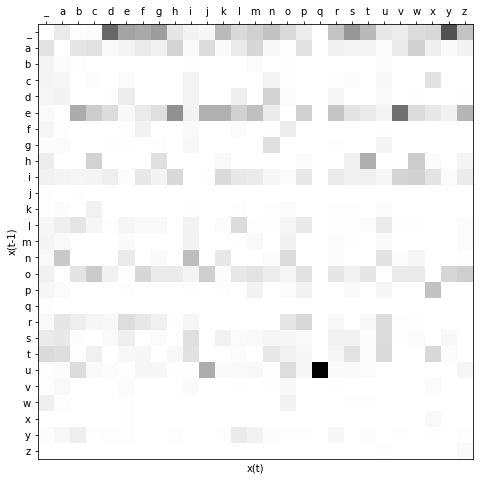

In [20]:
%matplotlib inline
import matplotlib.pylab as plt

# Reduction table
my2ascii_table = {
    ord(u'â'):"a",
    ord(u'ä'):"e",
    ord(u"à"):"a",
    ord(u"æ"):"a",
    ord(u'ç'):"c",
    ord(u"é"):"e",
    ord(u"è"):"e",
    ord(u"ê"):"e",
    ord(u"ë"):"e",
    ord(u'ğ'):"g",
    ord(u'ı'):"i",
    ord(u"î"):"i",
    ord(u'ï'):"i",
    ord(u'œ'):"o",
    ord(u"ô"):"o",
    ord(u'ö'):"o",
    ord(u'ş'):"s",
    ord(u'ù'):"u",
    ord(u"û"):"u",
    ord(u'ü'):"u",
    ord(u'ß'):"s"
    }


def letter2idx(x):
    if x=='_':
        i = 0
    else:
        i = ord(x)-ord('a')+1
    
    if i<0 or i>26:
        i = ord(my2ascii_table[ord(x)])-ord('a')+1
        
    return i

T = np.zeros((27,27))
# Convert bigrams to a transition matrix
for pair in bigrams:
    c = pair[1]
    s = list(pair[0])
    j = letter2idx(s[0])
    i = letter2idx(s[1])
    T[i,j] += c

plt.figure(figsize=(8,8))

alphabet=[chr(i+ord('a')) for i in range(26) ]
alphabet.insert(0,'_')
M = len(alphabet)

plt.imshow(T/np.sum(T,axis=0), interpolation='nearest', vmin=0,cmap='gray_r')
plt.xticks(range(M), alphabet)
plt.xlabel('x(t)')
plt.yticks(range(M), alphabet)
plt.ylabel('x(t-1)')
ax = plt.gca()
ax.xaxis.tick_top()
#ax.set_title(f, va='bottom')
plt.xlabel('x(t)')

plt.show()



## Monte Carlo with Spark

In [24]:
import numpy as np
import pyspark

def sample(p):
    x, y = 2*np.random.rand()-1, 2*np.random.rand()-1
    return 1 if x*x + y*y < 1 else 0

NUM_SAMPLES = 1000000

count = sc.parallelize(xrange(0, NUM_SAMPLES)).map(sample).reduce(lambda a, b: a + b)

print("Pi is roughly %f" % (4.0 * count / NUM_SAMPLES))

Pi is roughly 3.148096


Spark application: 
* a driver program that runs the user’s main function, that executes various parallel operations on a cluster. 

Main abstraction: 
* resilient distributed dataset (RDD), 
* a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel. 

RDD: 
* Created from a file in the Hadoop file system (or any other Hadoop-supported file system)
* Automatically recover from node failures.

Cached: 
* Ask Spark to persist an RDD in memory

Shared variables: 
* broadcast variables: cache a value in memory on all nodes, 
* accumulators: counters and sums.



Spark’s Python API data formats (as of Nov 2016):

* SparkContext.wholeTextFiles:
read a directory containing of multiple small text files, return (filename, content) pairs. 

* RDD.saveAsPickleFile and SparkContext.pickleFile:
save an RDD as pickled Python objects. 

* SequenceFile and Hadoop Input/Output Formats



## Reading Json

In [21]:
from pyspark.sql import SparkSession

#    .config("spark.some.config.option", "some-value") \

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

df = spark.read.json("data/products.json")
# Displays the content of the DataFrame to stdout
df.show()

+-------+--------------------+
|   name|          properties|
+-------+--------------------+
|Product|[[Product identif...|
+-------+--------------------+



In [22]:
#df.printSchema()
df.select("properties").show()

+--------------------+
|          properties|
+--------------------+
|[[Product identif...|
+--------------------+



Reading Parquet

In [23]:
df = spark.read.parquet("file")


AnalysisException: u'Path does not exist: file:/Users/cemgil/Downloads/sahibinden_NativeAdFeaturesEdr/dt=20171028/000000_0;'

In [28]:
df.describe()

DataFrame[summary: string, flakeid: string, deliveryid: string, adid: string, version: string, channel: string, bidpricekurus: string, dailybudgetkurus: string, matchedadcity: string, adimpressioncount: string, adclickcount: string, adctr: string, adtitle: string, addescription: string, adcalltoaction: string, accountadcount: string, accountdayssincefirstadcreation: string, eventtype: string, vieweruniqueuserid: string, viewercity: string, vieweradimpressioncount: string, viewertotalimpressioncount: string, viewertotalclickcount: string, viewerip: string, trackingsinceseconds: string, vieweruserid: string, edrtypename: string, edrgroup: string, edrhostname: string, edruniqueid: string]